## Exploratory Data Visualization - using matplotlib, seaborn, and altair to explore a dataset

Second Assignment of MUSA 620 Data Wrangling and Data Visualization at University of Pennsylvania

We will be exploring the box score and standing statistics dataset from the NBA (2012-present). The original dataset is posted on https://www.kaggle.com/pablote/nba-enhanced-stats#2012-18_playerBoxScore.csv

### Making Sense of Data

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
dat = pd.read_csv('2012-18_playerBoxScore.csv', engine='python', parse_dates=['gmDate'])

In [3]:
dat.head()

gmDate gmTime  seasTyp playLNm  playFNm teamAbbr teamConf    teamDiv  \
0 2012-10-30  19:00  Regular   Price     A.J.      WAS     East  Southeast   
1 2012-10-30  19:00  Regular   Ariza   Trevor      WAS     East  Southeast   
2 2012-10-30  19:00  Regular  Okafor    Emeka      WAS     East  Southeast   
3 2012-10-30  19:00  Regular    Beal  Bradley      WAS     East  Southeast   
4 2012-10-30  19:00  Regular  Booker   Trevor      WAS     East  Southeast   

  teamLoc teamRslt  ...  playFT% playORB playDRB playTRB opptAbbr opptConf  \
0    Away     Loss  ...      1.0       1       1       2      CLE     East   
1    Away     Loss  ...      0.5       1       2       3      CLE     East   
2    Away     Loss  ...      0.5       5       2       7      CLE     East   
3    Away     Loss  ...      1.0       0       3       3      CLE     East   
4    Away     Loss  ...      0.0       1       0       1      CLE     East   

   opptDiv opptLoc opptRslt  opptDayOff  
0  Central    Home      Win           0  
1  Central    Home      Win           0  
2  Central    Home      Win           0  
3  Central    Home      Win           0  
4  Central    Home      Win           0  

[5 rows x 51 columns]

In [4]:
dat.columns

Index(['gmDate', 'gmTime', 'seasTyp', 'playLNm', 'playFNm', 'teamAbbr',
       'teamConf', 'teamDiv', 'teamLoc', 'teamRslt', 'teamDayOff', 'offLNm1',
       'offFNm1', 'offLNm2', 'offFNm2', 'offLNm3', 'offFNm3', 'playDispNm',
       'playStat', 'playMin', 'playPos', 'playHeight', 'playWeight',
       'playBDate', 'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK',
       'playPF', 'playFGA', 'playFGM', 'playFG%', 'play2PA', 'play2PM',
       'play2P%', 'play3PA', 'play3PM', 'play3P%', 'playFTA', 'playFTM',
       'playFT%', 'playORB', 'playDRB', 'playTRB', 'opptAbbr', 'opptConf',
       'opptDiv', 'opptLoc', 'opptRslt', 'opptDayOff'],
      dtype='object')

### Creating a new column & Group by

In [5]:
pattern = '%Y-%m-%d'

def Season_Identifier(x):
    if x < datetime.datetime.strptime('2013-5-1', pattern):
        return '2012-2013'
    elif x < datetime.datetime.strptime('2014-5-1', pattern):
        return '2013-2014'
    elif x < datetime.datetime.strptime('2015-5-1', pattern):
        return '2014-2015'
    elif x < datetime.datetime.strptime('2016-5-1', pattern):
        return '2015-2016'
    elif x < datetime.datetime.strptime('2017-5-1', pattern):
        return '2016-2017'
    else:
        return '2017-2018'
    
    
dat['Season'] = dat['gmDate'].apply(lambda x : Season_Identifier(x))

In [6]:
team_stats = dat.groupby(['gmDate', 'teamAbbr', 'teamConf', 'Season'])['playPTS'].sum().reset_index()

In [7]:
team_stats_season = team_stats.groupby(['Season', 'teamAbbr', 'teamConf'])['playPTS'].mean().reset_index()

### 1st plot via Seaborn

Text(0.5, 1.0, 'Distribution of Points by Conference by Season')

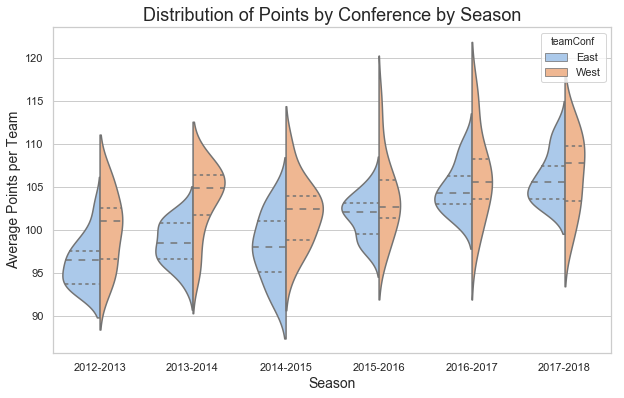

In [8]:
sns.set(style = "whitegrid", palette = "pastel", color_codes = True)

sns.violinplot(x = "Season", y = "playPTS", hue = "teamConf",
               split = True, inner = "quart",
               data = team_stats_season)

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Points per Team', fontsize=14)
plt.title('Distribution of Points by Conference by Season', fontsize=18)

> The reason why a violin plot is chosen is that it is able to convey three dimensional messages (in this case, distribution of points per game of each team, different seasons, and different conferences). As shown above, for the first three seasons in the dataset, the distribution of points per game in both conferences were more concentrated, and that teams in Western Conference can score more points. After 2015-2016 NBA Season, average points per game in the entire league increase, and the distribution of Western Conference has become more spread. There are a few teams in the Western Conference that play offense pretty well.

### 2nd plot via Seaborn

Text(0.5, 1.0, 'Distribution of Points per Game by Season')

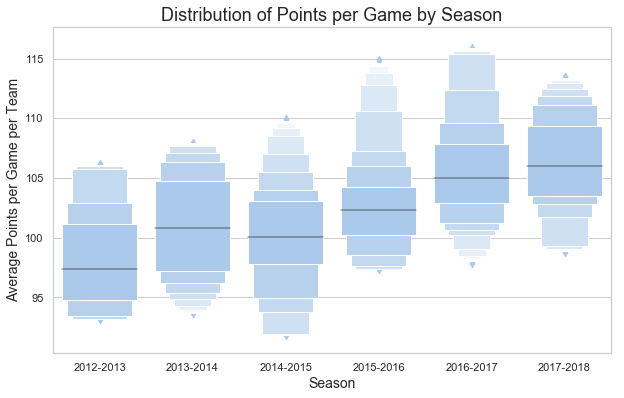

In [9]:
sns.boxenplot(x="Season", y="playPTS",
              color="b",
              scale="linear", data=team_stats_season)

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Points per Game per Team', fontsize=14)
plt.title('Distribution of Points per Game by Season', fontsize=18)

> The above plot tells a similar story. After 2015-2016 Season, teams in NBA have begun to play offence better than before.

### Creating a new dataset for plotting

In [10]:
boxscore = dat.groupby(['gmDate', 'teamAbbr'])['playPTS'].sum().reset_index()
boxscore['Month'] = boxscore['gmDate'].apply(lambda x : '%d-%02d' % (x.year, x.month))

team_score_month = boxscore.groupby(['Month', 'teamAbbr'])['playPTS'].mean().reset_index()

In [11]:
team_score_month.describe()

playPTS
count  1252.000000
mean    102.272359
std       6.678720
min      75.000000
25%      98.000000
50%     102.345238
75%     106.540625
max     125.500000

### 3rd plot via Altair

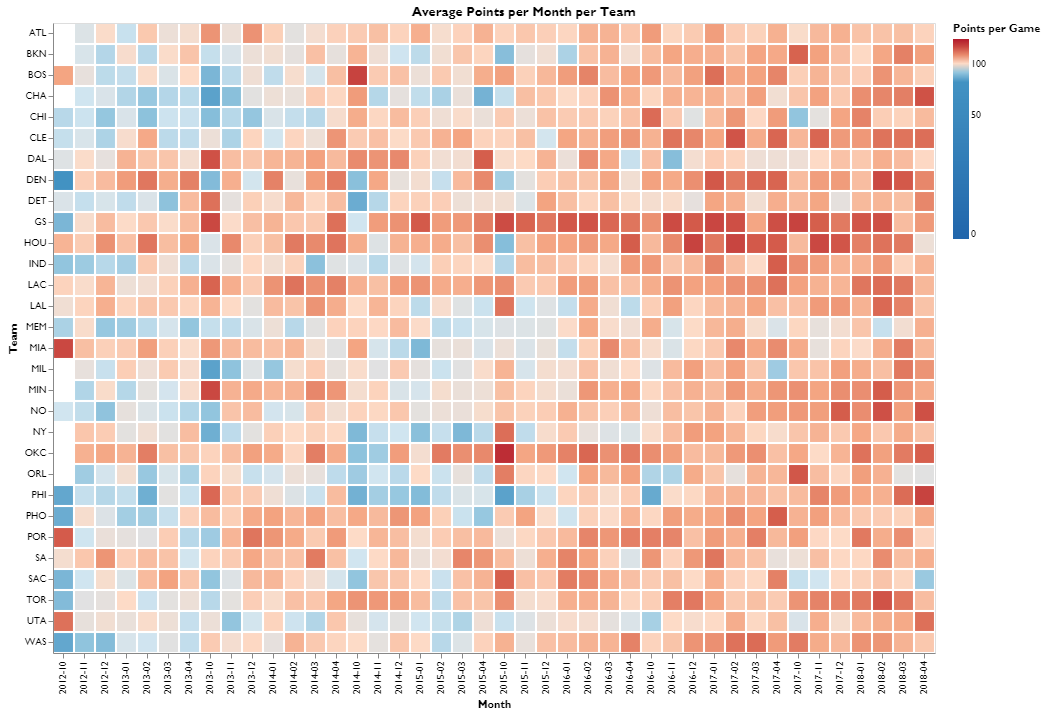

In [12]:
colormap = alt.Scale(domain=[0, 80, 90, 95, 100, 107, 115, 130],
                     range=["#2166ac","#4393c3","#92c5de","#d1e5f0","#fddbc7","#f4a582","#d6604d","#b2182b"],
                     type='sqrt')

alt.Chart(team_score_month).mark_rect().encode(
    x='Month:O',
    y=alt.Y('teamAbbr', axis=alt.Axis(title='Team')),
    color=alt.Color('playPTS', scale=colormap, legend=alt.Legend(title="Points per Game")),
    tooltip=['Month', 
             alt.Tooltip('teamAbbr', title = 'Team'), 
             alt.Tooltip('playPTS', title = 'Points per Game')]
).properties(title = 'Average Points per Month per Team'
)


> The above heatmap illustrates that generally speaking, average points per game per month of almost every team becomes higher in latest seasons.

### 4th plot via Altair

In [13]:
player_stats = dat.groupby(['Season', 'playDispNm', 'teamConf']).agg({'playPTS': 'mean', 'playFGA': 'sum', 'playFGM': 'sum', 'play3PA': 'sum',
                                                        'play3PM': 'sum',}).reset_index()

player_stats['FG_pct'] = player_stats['playFGM'] / player_stats['playFGA']
player_stats['Three_pct'] = player_stats['play3PM'] / player_stats['play3PA']
player_stats['FG_pct'].fillna(0, inplace = True)
player_stats['Three_pct'].fillna(0, inplace = True)

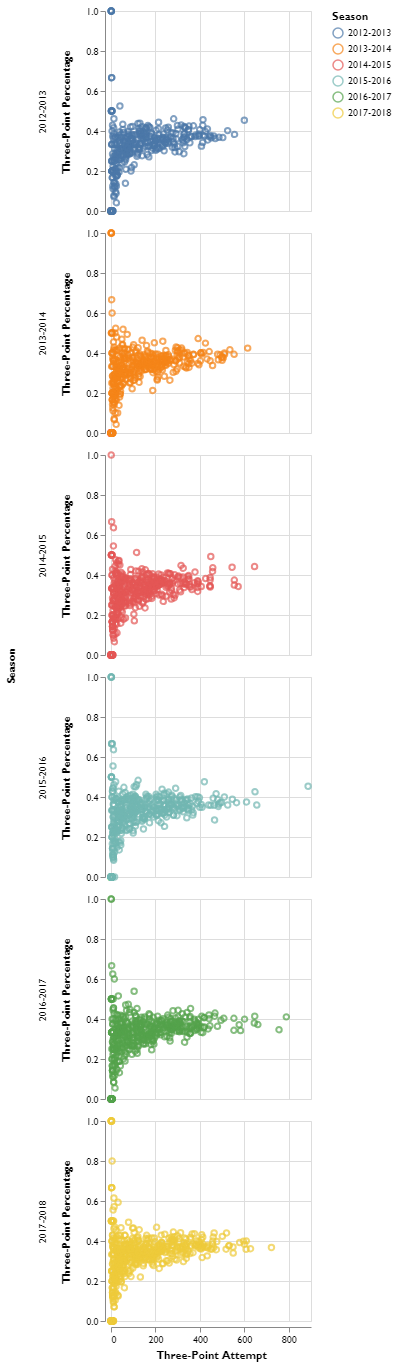

In [14]:
brush = alt.selection_interval()

alt.Chart(player_stats).mark_point().encode(
    x=alt.X('play3PA', axis=alt.Axis(title='Three-Point Attempt')),
    y=alt.X('Three_pct', axis=alt.Axis(title='Three-Point Percentage')),
    color=alt.condition(brush, 'Season', alt.value('lightgray')),
    tooltip=[alt.Tooltip('playDispNm', title = 'Name'),
             alt.Tooltip('Season', title = 'Season'),
            alt.Tooltip('play3PA', title = 'Three-Point Attempt'),
            alt.Tooltip('Three_pct', title = 'Three-Point Percentage')]
).properties(
    width=200, 
    height=200,
    selection=brush
).facet(row='Season'
       )

> Let's try to find the reasons behind. The facetted scatter plot above displays each player's three-point attempts and his three-point percentage (the frequency that a player can hit a 3-point shot) in each season. It can be noted that the percentages have not changed much. However, in 2012-2013 season, only Stephen Curry attempted over 600 3-point shots, while in the last season (2017-2018), 5 players attempted more than 600 3-point shots. This may indicate that more 3pt attempts (and hence more 3pt field goals) leads to higher scores per game.

### Creating a new dataset for plotting

In [15]:
GSW = dat[dat['playDispNm'].isin(['Stephen Curry', 'Klay Thompson', 'Kevin Durant', 'Draymond Green'])]

In [16]:
GSW = GSW[GSW['Season'] == '2017-2018']

### 5th plot via Matplotlib

Text(0.5, 1.0, 'Distribution of Points by Player')

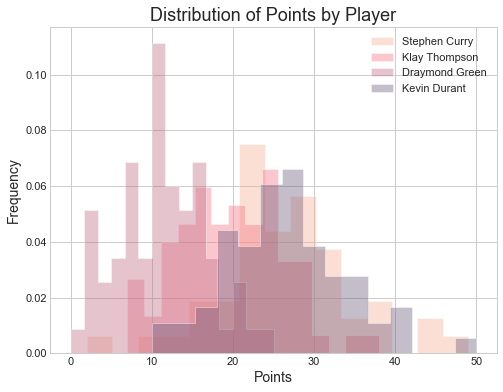

In [17]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots()

ax.hist(GSW[GSW['playDispNm'] == 'Stephen Curry']['playPTS'], histtype="stepfilled", 
        bins = 15, alpha = 0.4, color = '#F8B195', density=True)
ax.hist(GSW[GSW['playDispNm'] == 'Klay Thompson']['playPTS'], histtype="stepfilled", 
        bins = 15, alpha = 0.4, color = '#F67280', density=True)
ax.hist(GSW[GSW['playDispNm'] == 'Draymond Green']['playPTS'], histtype="stepfilled", 
        bins = 15, alpha = 0.4, color = '#C06C84', density=True)
ax.hist(GSW[GSW['playDispNm'] == 'Kevin Durant']['playPTS'], histtype="stepfilled", 
        bins = 15, alpha = 0.4, color = '#6C5B7B', density=True)

ax.legend(labels = ['Stephen Curry', 'Klay Thompson', 'Draymond Green', 'Kevin Durant'])

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.xlabel('Points', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Points by Player', fontsize=18)

> Other than identifying patterns of the entire league, this notebook also dives into micro-level patterns. The above layered histogram details the distribution of points by selected players in Golden State Warriors. In 2017-2018 season, all of these four players are nominated as an "All-Star". It seems that Stephen Curry and Kevin Durant normally score more points than their all-star teammates.

### Creating a new dataset and making the 6th plot via Altair

In [18]:
MVP = dat[dat['playDispNm'].isin(['Stephen Curry', 'James Harden'])]
MVP = MVP[MVP['Season'] == '2017-2018']

In [19]:
MVP.head()

gmDate gmTime  seasTyp playLNm  playFNm teamAbbr teamConf  \
129625 2017-10-17  10:30  Regular  Harden    James      HOU     West   
129634 2017-10-17  10:30  Regular   Curry  Wardell       GS     West   
129854 2017-10-18  10:00  Regular  Harden    James      HOU     West   
130127 2017-10-20  09:30  Regular   Curry  Wardell       GS     West   
130249 2017-10-21  08:00  Regular  Harden    James      HOU     West   

          teamDiv teamLoc teamRslt  ...  playORB playDRB playTRB opptAbbr  \
129625  Southwest    Away      Win  ...        1       5       6       GS   
129634    Pacific    Home     Loss  ...        0       5       5      HOU   
129854  Southwest    Away      Win  ...        2       1       3      SAC   
130127    Pacific    Away      Win  ...        0       3       3       NO   
130249  Southwest    Home      Win  ...        0       3       3      DAL   

       opptConf    opptDiv opptLoc opptRslt opptDayOff     Season  
129625     West    Pacific    Home     Loss          0  2017-2018  
129634     West  Southwest    Away      Win          0  2017-2018  
129854     West    Pacific    Home     Loss          0  2017-2018  
130127     West  Southwest    Home     Loss          2  2017-2018  
130249     West  Southwest    Away     Loss          0  2017-2018  

[5 rows x 52 columns]

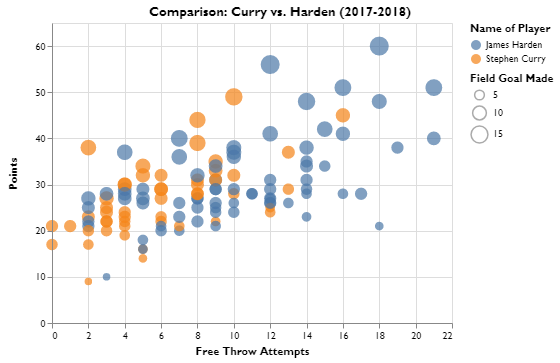

In [20]:
alt.Chart(MVP).mark_circle().encode(
    alt.X('playFTA', scale=alt.Scale(zero=False), axis=alt.Axis(title='Free Throw Attempts')),
    alt.Y('playPTS', scale=alt.Scale(zero=False, padding=1), axis=alt.Axis(title='Points')),
    color=alt.Color('playDispNm', legend=alt.Legend(title="Name of Player")),
    size=alt.Size('playFGM', legend=alt.Legend(title="Field Goal Made")),
    tooltip = [alt.Tooltip('playDispNm', title = 'Name'),
             alt.Tooltip('playPTS', title = 'Points'),
            alt.Tooltip('playFGM', title = 'Field Goal Made'),
            alt.Tooltip('playFTA', title = 'Free Throw Attempts')]
).properties(
    title='Comparison: Curry vs. Harden (2017-2018)'
)

> Both Curry and Harden were drafted in the 2009 NBA Draft, and both are former MVP. In the last season, it seems that Harden performed a little better than Curry in terms of scoring, with multiple 50+ point games. What may also worth noticing is that Harden was likely to get more free throws than Curry in most games.

### 7th Plot via Altair

In [21]:
player_score = dat[dat['playDispNm'].isin(['Stephen Curry', 'James Harden', 
                                           'Kevin Durant', 'LeBron James', 
                                           'Russell Westbrook', 'Kawhi Leonard',
                                           'Giannis Antetokounmpo', 'Anthony Davis'])]

In [22]:
player_score.head()

gmDate gmTime  seasTyp  playLNm  playFNm teamAbbr teamConf    teamDiv  \
34  2012-10-30  20:00  Regular    James   LeBron      MIA     East  Southeast   
101 2012-10-31  19:30  Regular   Harden    James      HOU     West  Southwest   
143 2012-10-31  20:00  Regular  Leonard    Kawhi       SA     West  Southwest   
153 2012-10-31  20:00  Regular    Davis  Anthony       NO     West  Southwest   
189 2012-10-31  22:00  Regular    Curry  Wardell       GS     West    Pacific   

    teamLoc teamRslt  ...  playORB playDRB playTRB opptAbbr opptConf  \
34     Home      Win  ...        1       9      10      BOS     East   
101    Away      Win  ...        1       5       6      DET     East   
143    Away      Win  ...        1       6       7       NO     West   
153    Home     Loss  ...        3       4       7       SA     West   
189    Away      Win  ...        3       4       7      PHO     West   

       opptDiv opptLoc opptRslt opptDayOff     Season  
34    Atlantic    Away     Loss          0  2012-2013  
101    Central    Home     Loss          0  2012-2013  
143  Southwest    Home     Loss          0  2012-2013  
153  Southwest    Away      Win          0  2012-2013  
189    Pacific    Home     Loss          0  2012-2013  

[5 rows x 52 columns]

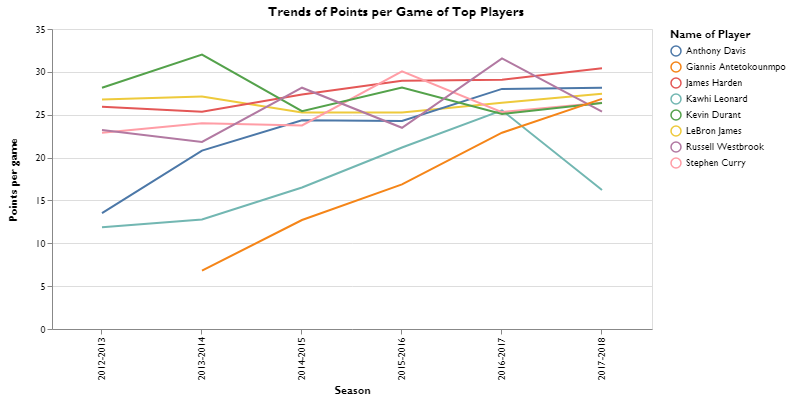

In [23]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Season'], empty='none')

# The basic line
line = alt.Chart().mark_line().encode(
    x='Season',
    y=alt.Y('mean(playPTS)', axis=alt.Axis(title='Points per game')),
    color=alt.Color('playDispNm', legend=alt.Legend(title="Name of Player"))
).properties(title = 'Trends of Points per Game of Top Players'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='Season',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'mean(playPTS):Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='Season',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(line, selectors, points, rules, text,
          data=player_score, width=600, height=300)

> Above shows trends of points per game of several MVP candidates. Some of the players have been performing stably through the past seasons, such as LeBron James, Kevin Durant, and Stephen Curry. There are three players who has improved themselves a lot, i.e. Giannis Antetokounmpo, Anthony Davis, and Kawhi Leonard.

### Dashboard via Altair

In [24]:
shooter = player_stats[player_stats['playDispNm'].isin(['Stephen Curry', 'Klay Thompson', 'Kyle Korver',
                                                       'James Harden', 'J.J. Redick', 'Damian Lillard',
                                                       'Eric Gordon', 'Paul George', 'Kyle Lowry', 'J.R. Smith'])]

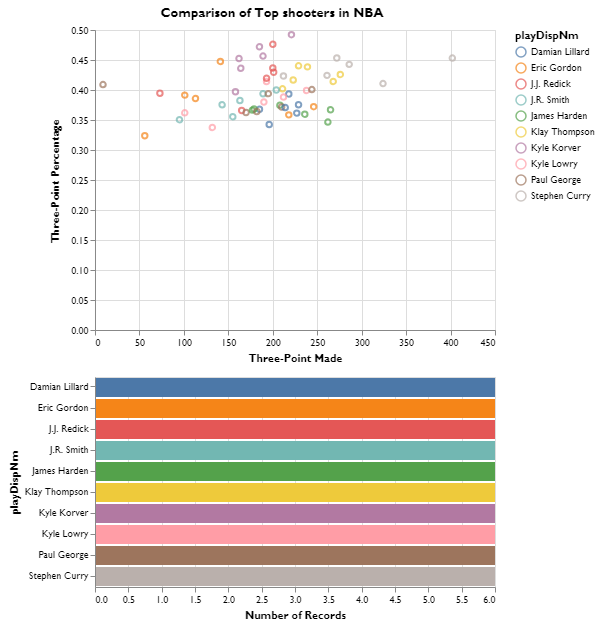

In [25]:
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    x=alt.X('play3PM', axis=alt.Axis(title='Three-Point Made')),
    y=alt.Y('Three_pct', axis=alt.Axis(title='Three-Point Percentage')),
    color=alt.condition(brush, 'playDispNm:N', alt.value('gray')),
    tooltip = [alt.Tooltip('playDispNm', title = 'Name'), 
               'Season',
               alt.Tooltip('play3PM', title = 'Three-Point Made'),
               alt.Tooltip('Three_pct', title = 'Three-Point Percentage')]
).add_selection(
    brush
).properties(title = 'Comparison of Top shooters in NBA'
)

bars = alt.Chart().mark_bar().encode(
    x='count(playDispNm):Q',
    y='playDispNm:N',
    color='playDispNm:N'
).transform_filter(
    brush
)

alt.vconcat(points, bars, data=shooter)



> Lastly, this notebook compares the renowned shooters in the league. In the last six seasons, Stephen Curry made more 3s than any other player, at the meantime keeping an incredibly high 3-point percentage. Speaking of 3-point percentage, Kyle Korver, J.J. Redick, Klay Thompson, and Stephen Curry stand out among others.